# Problem Set 2: Analysis of racial disparities in felony sentencing, Part 2

Part 2: Investigating Black vs. White sentencing disparities

We're going to investigate different types of disparities in sentencing between Black defendants and White defendants. 
We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)

## 1.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


df = pd.read_pickle('pset2_inputdata/sentencing_cleaned.pkl')

c:\Users\sharp\miniforge3\envs\qss20\Lib\site-packages\pandas\compat\pickle_compat.py:35: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  stack[-1] = func(*args)
c:\Users\sharp\miniforge3\envs\qss20\Lib\site-packages\pandas\compat\pickle_compat.py:35: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  stack[-1] = func(*args)
c:\Users\sharp\miniforge3\envs\qss20\Lib\site-packages\pandas\compat\pickle_compat.py:35: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  stack[-1] = func(*args)


In [13]:
df.columns

Index(['CASE_ID', 'CASE_PARTICIPANT_ID', 'RECEIVED_DATE', 'OFFENSE_CATEGORY',
       'PRIMARY_CHARGE_FLAG', 'CHARGE_ID', 'CHARGE_VERSION_ID',
       'DISPOSITION_CHARGED_OFFENSE_TITLE', 'CHARGE_COUNT', 'DISPOSITION_DATE',
       'DISPOSITION_CHARGED_CHAPTER', 'DISPOSITION_CHARGED_ACT',
       'DISPOSITION_CHARGED_SECTION', 'DISPOSITION_CHARGED_CLASS',
       'DISPOSITION_CHARGED_AOIC', 'CHARGE_DISPOSITION',
       'CHARGE_DISPOSITION_REASON', 'SENTENCE_JUDGE', 'SENTENCE_COURT_NAME',
       'SENTENCE_COURT_FACILITY', 'SENTENCE_PHASE', 'SENTENCE_DATE',
       'SENTENCE_TYPE', 'CURRENT_SENTENCE_FLAG', 'COMMITMENT_TYPE',
       'COMMITMENT_TERM', 'COMMITMENT_UNIT', 'LENGTH_OF_CASE_in_Days',
       'AGE_AT_INCIDENT', 'RACE', 'GENDER', 'INCIDENT_CITY',
       'INCIDENT_BEGIN_DATE', 'INCIDENT_END_DATE', 'LAW_ENFORCEMENT_AGENCY',
       'LAW_ENFORCEMENT_UNIT', 'ARREST_DATE', 'FELONY_REVIEW_DATE',
       'FELONY_REVIEW_RESULT', 'ARRAIGNMENT_DATE', 'UPDATED_OFFENSE_CATEGORY',
       'is_changed_

## 1.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

In [14]:
# Group by month/year and calculate proportions
monthly_stats = df.groupby("sentenceym_derived").agg(
    total_cases=("CASE_ID", "nunique"),
    black_count=("is_black_derived", "sum"),
    white_count=("is_white_derived", "sum")
).reset_index()

# Calculate proportions
monthly_stats["prop_black"] = monthly_stats["black_count"] / monthly_stats["total_cases"]
monthly_stats["prop_white"] = monthly_stats["white_count"] / monthly_stats["total_cases"]

# Print the table
print("Monthly Proportions of Black and White Defendants:")
print(monthly_stats.to_string())


Monthly Proportions of Black and White Defendants:
    sentenceym_derived  total_cases  black_count  white_count  prop_black  prop_white
0           2012-01-01         1674         1134          242    0.677419    0.144564
1           2012-02-01         1450          941          233    0.648966    0.160690
2           2012-03-01         1612         1030          255    0.638958    0.158189
3           2012-04-01         1436         1000          211    0.696379    0.146936
4           2012-05-01         1545         1074          223    0.695146    0.144337
5           2012-06-01         1747         1214          251    0.694906    0.143675
6           2012-07-01         1746         1197          258    0.685567    0.147766
7           2012-08-01         1684         1161          251    0.689430    0.149050
8           2012-09-01         1485         1020          210    0.686869    0.141414
9           2012-10-01         1815         1199          262    0.660606    0.144353
10 

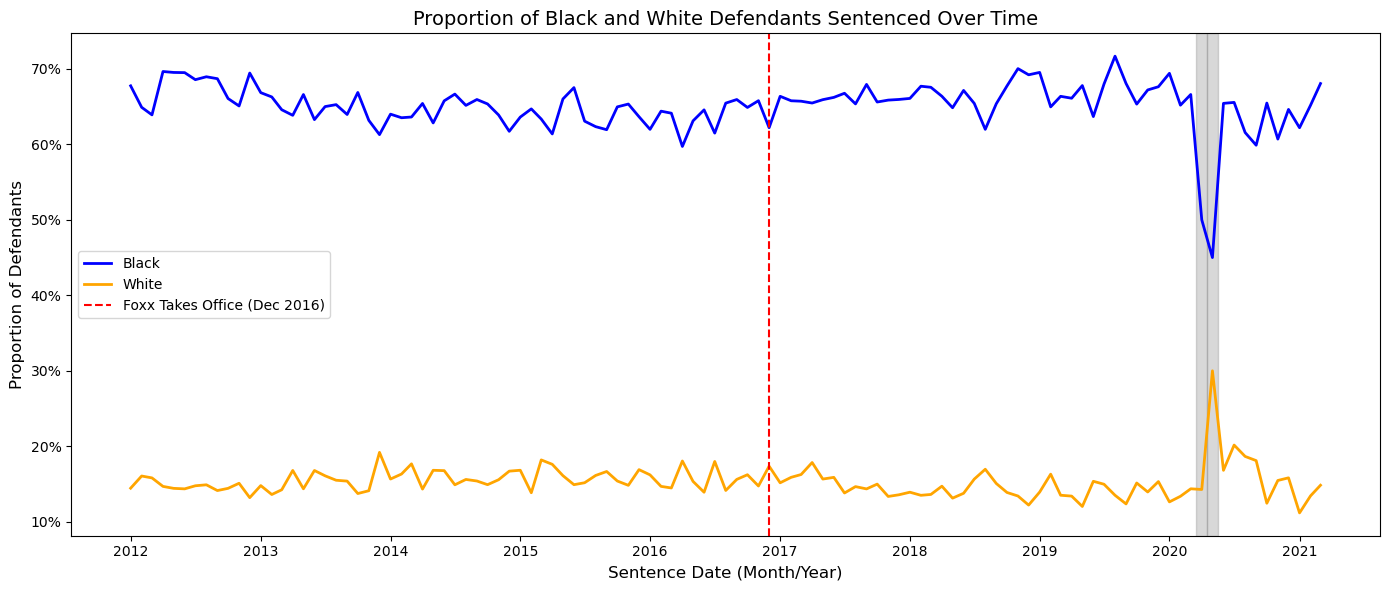

In [15]:
# Create the visualization
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the two lines
ax.plot(monthly_stats["sentenceym_derived"], monthly_stats["prop_black"], label="Black", color="blue", linewidth=2)
ax.plot(monthly_stats["sentenceym_derived"], monthly_stats["prop_white"], label="White", color="orange", linewidth=2)

## Optional Challege

# Shade background for months with fewer than 100 cases
monthly_stats["is_low_case"] = monthly_stats["total_cases"] < 100

for date in monthly_stats.loc[monthly_stats["is_low_case"], "sentenceym_derived"]:
    ax.axvspan(date - pd.DateOffset(days=15), date + pd.DateOffset(days=15), alpha=0.3, color="gray")

# Add vertical line for 12-01-2016 (Foxx took office)
ax.axvline(x=pd.Timestamp("2016-12-01"), color="red", linestyle="--", 
           linewidth=1.5, label="Foxx Takes Office (Dec 2016)")

# Labels and legend
ax.set_xlabel("Sentence Date (Month/Year)", fontsize=12)
ax.set_ylabel("Proportion of Defendants", fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.set_title("Proportion of Black and White Defendants Sentenced Over Time", fontsize=14)
ax.legend(loc="best")

plt.tight_layout()
plt.show()

### Mathematical Notation and Interpretation

For each month $t$, we calculate:

$$\text{Proportion Black}_t = \frac{\sum_{i=1}^{N_t} \mathbf{1}[\text{is\_black\_derived}_i = 1]}{N_t}$$

$$\text{Proportion White}_t = \frac{\sum_{i=1}^{N_t} \mathbf{1}[\text{is\_white\_derived}_i = 1]}{N_t}$$

where $N_t$ is the number of unique cases sentenced in month $t$, and $\mathbf{1}[\text{is\_racetype\_derived}_i=1]$ is the indicator function.

**Trends**: Black defendants consistently represent a larger proportion of those sentenced (~60-70%) compared to White defendants (~15-20%) throughout the period. In April and May 2020, we see unusual patterns likely due to COVID-19 pandemic disruptions. Court operations were most likely reduced, leading to fewer total cases being processed and potentially affecting which types of cases and defendants were prioritized for sentencing. The gray shaded regions indicate months with fewer than 100 cases, highlighting this disruption.

## 1.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

In [16]:
# Create indicator for incarceration
df["is_incarcerated"] = (df["COMMITMENT_TYPE"] == "Illinois Department of Corrections").astype(int)

# Filter to Black and White defendants only
black_df = df[df["is_black_derived"] == 1]
white_df = df[df["is_white_derived"] == 1]

# Calculate monthly incarceration rates for Black defendants
black_monthly = black_df.groupby("sentenceym_derived").agg(
    black_total=("CASE_ID", "nunique"),
    black_incarcerated=("is_incarcerated", "sum")
).reset_index()
black_monthly["black_incarceration_rate"] = black_monthly["black_incarcerated"] / black_monthly["black_total"]
black_monthly["black_incarceration_rate_smooth"] = black_monthly["black_incarceration_rate"].rolling(window=6, center=True, min_periods=1).mean()

# Calculate monthly incarceration rates for White defendants
white_monthly = white_df.groupby("sentenceym_derived").agg(
    white_total=("CASE_ID", "nunique"),
    white_incarcerated=("is_incarcerated", "sum")
).reset_index()
white_monthly["white_incarceration_rate"] = white_monthly["white_incarcerated"] / white_monthly["white_total"]
white_monthly["white_incarceration_rate_smooth"] = white_monthly["white_incarceration_rate"].rolling(window=6, center=True, min_periods=1).mean()

# Merge the two dataframes
disparity_df = black_monthly.merge(white_monthly, on="sentenceym_derived", how="outer")

# Calculate the disparity (Black - White)
disparity_df["incarceration_gap"] = disparity_df["black_incarceration_rate"] - disparity_df["white_incarceration_rate"]
disparity_df["smoothed_gap"] = disparity_df["incarceration_gap"].rolling(window=6, center=True, min_periods=1).mean()

# Print the table
print("Monthly Incarceration Rates and Black-White Disparity:")
print(disparity_df[["sentenceym_derived", "black_incarceration_rate", "white_incarceration_rate", "incarceration_gap"]].to_string())



Monthly Incarceration Rates and Black-White Disparity:
    sentenceym_derived  black_incarceration_rate  white_incarceration_rate  incarceration_gap
0           2012-01-01                  0.594356                  0.359504           0.234852
1           2012-02-01                  0.601488                  0.373391           0.228097
2           2012-03-01                  0.584466                  0.443137           0.141329
3           2012-04-01                  0.598000                  0.445498           0.152502
4           2012-05-01                  0.539106                  0.327354           0.211752
5           2012-06-01                  0.611203                  0.450199           0.161003
6           2012-07-01                  0.650794                  0.430233           0.220561
7           2012-08-01                  0.608958                  0.438247           0.170711
8           2012-09-01                  0.579412                  0.352381           0.227031
9    

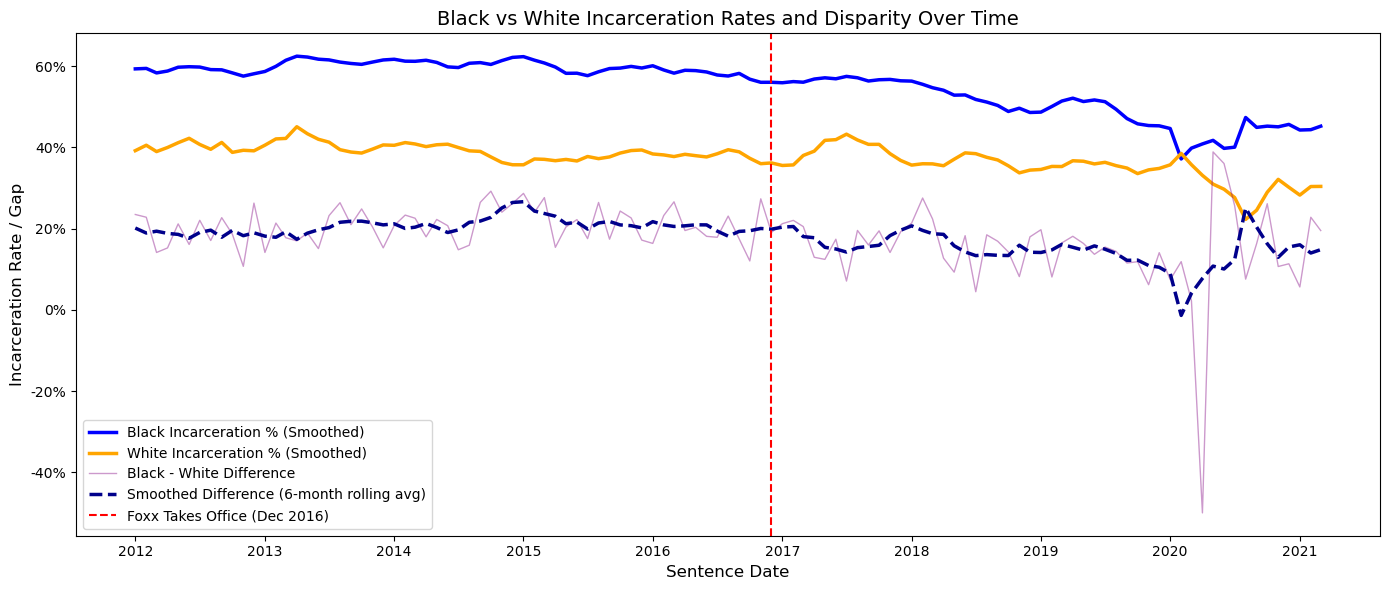

In [17]:
# Create the graphs
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the smoothed lines
ax.plot(disparity_df["sentenceym_derived"], disparity_df["black_incarceration_rate_smooth"], 
        label="Black Incarceration % (Smoothed)", color="blue", linewidth=2.5)
ax.plot(disparity_df["sentenceym_derived"], disparity_df["white_incarceration_rate_smooth"], 
        label="White Incarceration % (Smoothed)", color="orange", linewidth=2.5)

# Plot the disparity line and its smoothed version
ax.plot(disparity_df["sentenceym_derived"], disparity_df["incarceration_gap"], 
        label="Black - White Difference", color="purple", linewidth=1, alpha=0.4)
ax.plot(disparity_df["sentenceym_derived"], disparity_df["smoothed_gap"], 
        label="Smoothed Difference (6-month rolling avg)", color="darkblue", linewidth=2.5, linestyle="--")

# Add vertical line for Foxx taking office
ax.axvline(x=pd.Timestamp("2016-12-01"), color="red", linestyle="--", 
           linewidth=1.5, label="Foxx Takes Office (Dec 2016)")

# Labels and legend
ax.set_xlabel("Sentence Date", fontsize=12)
ax.set_ylabel("Incarceration Rate / Gap", fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.set_title("Black vs White Incarceration Rates and Disparity Over Time", fontsize=14)
ax.legend(loc="best")

plt.tight_layout()
plt.show()

#### Observations on Incarceration Disparity Trends

The graph shows that Black defendants consistently have higher incarceration rates than White defendants throughout the period, with the gap (Black - White) remaining positive. The disparity appears relatively stable over time, fluctuating around 5-15 percentage points, with no clear evidence of the gap systematically widening or narrowing after State's Attorney Foxx took office in December 2016. The smoothed trend, by a 6 month rolling avg line, helps visualize that while there is month-to-month variation, the overall disparity persists without dramatic changes in magnitude.

## 1.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

In [18]:
# Distribution of simplified_offense_derived
print("Overview of offense types in the data:")
print(f"Total unique offense types: {df['simplified_offense_derived'].nunique()}")
print(f"\nMost common offenses overall:")
print(df['simplified_offense_derived'].value_counts().head(15))

Overview of offense types in the data:
Total unique offense types: 64

Most common offenses overall:
simplified_offense_derived
Narcotics                                    38780
DUI                                          12952
UUW - Unlawful Use of Weapon                 11885
Retail Theft                                 10546
Driving With Suspended Or Revoked License     8125
Battery                                       7432
Burglary                                      6431
Theft                                         4386
Residential Burglary                          3688
Vehicle-related                               3354
Robbery                                       2997
Escape - Failure to Return                    2637
Failure to Register as a Sex Offender         2301
Other Offense                                 2225
Armed Robbery                                 2147
Name: count, dtype: int64


### 1.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [19]:
# Top 10 offenses for Black defendants
top_black_offenses = (black_df.groupby("simplified_offense_derived")["CASE_ID"]
                      .nunique()
                      .sort_values(ascending=False)
                      .head(10)
                      .index.tolist())

# Top 10 offenses for White defendants
top_white_offenses = (white_df.groupby("simplified_offense_derived")["CASE_ID"]
                      .nunique()
                      .sort_values(ascending=False)
                      .head(10)
                      .index.tolist())

# Union of both sets
frequent_offenses = set(top_black_offenses).union(set(top_white_offenses))

print("Top 10 offenses for Black defendants:")
for i, offense in enumerate(top_black_offenses, 1):
    count = black_df[black_df["simplified_offense_derived"] == offense]["CASE_ID"].nunique()
    print(f"  {i}. {offense}: {count} cases")

print("\nTop 10 offenses for White defendants:")
for i, offense in enumerate(top_white_offenses, 1):
    count = white_df[white_df["simplified_offense_derived"] == offense]["CASE_ID"].nunique()
    print(f"  {i}. {offense}: {count} cases")

print(f"\nUnion of frequent offenses ({len(frequent_offenses)} unique offenses):")
for i, offense in enumerate(sorted(frequent_offenses), 1):
    print(f"  {i}. {offense}")

Top 10 offenses for Black defendants:
  1. Narcotics: 29451 cases
  2. UUW - Unlawful Use of Weapon: 9608 cases
  3. Retail Theft: 6812 cases
  4. Battery: 4650 cases
  5. Driving With Suspended Or Revoked License: 4459 cases
  6. DUI: 3842 cases
  7. Burglary: 3798 cases
  8. Theft: 2623 cases
  9. Vehicle-related: 2400 cases
  10. Robbery: 2348 cases

Top 10 offenses for White defendants:
  1. Narcotics: 4923 cases
  2. Retail Theft: 2509 cases
  3. DUI: 1995 cases
  4. Burglary: 1454 cases
  5. Battery: 1448 cases
  6. Driving With Suspended Or Revoked License: 1160 cases
  7. Theft: 1095 cases
  8. Residential Burglary: 717 cases
  9. Other Offense: 569 cases
  10. UUW - Unlawful Use of Weapon: 527 cases

Union of frequent offenses (12 unique offenses):
  1. Battery
  2. Burglary
  3. DUI
  4. Driving With Suspended Or Revoked License
  5. Narcotics
  6. Other Offense
  7. Residential Burglary
  8. Retail Theft
  9. Robbery
  10. Theft
  11. UUW - Unlawful Use of Weapon
  12. Vehic

### 1.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [20]:
# Filter to only frequent offenses
black_frequent = black_df[black_df["simplified_offense_derived"].isin(frequent_offenses)]
white_frequent = white_df[white_df["simplified_offense_derived"].isin(frequent_offenses)]

# Calculate incarceration rates for Black defendants by offense
black_offense_rates = black_frequent.groupby("simplified_offense_derived").agg(
    black_total=("CASE_ID", "nunique"),
    black_incarcerated=("is_incarcerated", "sum")
).reset_index()
black_offense_rates["black_incarceration_rate"] = (black_offense_rates["black_incarcerated"] / black_offense_rates["black_total"])

# Calculate incarceration rates for White defendants by offense
white_offense_rates = white_frequent.groupby("simplified_offense_derived").agg(
    white_total=("CASE_ID", "nunique"),
    white_incarcerated=("is_incarcerated", "sum")
).reset_index()
white_offense_rates["white_incarceration_rate"] = (white_offense_rates["white_incarcerated"] / white_offense_rates["white_total"])

# Merge to create wide-format table
offense_disparity = black_offense_rates.merge(white_offense_rates, on="simplified_offense_derived", how="outer")

# Calculate the disparity (Black - White)
offense_disparity["disparity"] = (offense_disparity["black_incarceration_rate"] - offense_disparity["white_incarceration_rate"])

# Sort by disparity to see largest gaps
offense_disparity_sorted = offense_disparity.sort_values("disparity", ascending=False)

# Wide format table for display
wide_table = offense_disparity_sorted[[
    "simplified_offense_derived", 
    "black_incarceration_rate", 
    "white_incarceration_rate", 
    "disparity",
    "black_total", 
    "white_total"
]].copy()

wide_table.columns = ["Offense Type", "Black Incarceration Rate", "White Incarceration Rate", "Disparity (B-W)", "Black N", "White N"]

# Convert certain columns to percentage for legibility
wide_table["Black Incarceration Rate"] = wide_table["Black Incarceration Rate"].apply(lambda x: f"{x:.1%}")
wide_table["White Incarceration Rate"] = wide_table["White Incarceration Rate"].apply(lambda x: f"{x:.1%}")
wide_table["Disparity (B-W)"] = wide_table["Disparity (B-W)"].apply(lambda x: f"{x:.1%}")

# Table output
print("Incarceration Rates by Race and Offense Type (in Wide Format)")
print(wide_table.to_string(index=False))

# Double line spaces into interpretation
print("\n\nInterpretation:")
print("-" * 100)
print("Offenses with LARGEST disparities (Black more likely to be incarcerated than White):")
top_disparities = offense_disparity_sorted.head(3)

# Format for output
# Output should look like this: - Offense Type: X.X% gap (Black: Y.Y%, White: Z.Z%)
for _, row in top_disparities.iterrows():
    print(f"  - {row['simplified_offense_derived']}: {row['disparity']:.1%} gap "
          f"(Black: {row['black_incarceration_rate']:.1%}, White: {row['white_incarceration_rate']:.1%})")

print("\nOffenses with SMALLEST or NEGATIVE disparities (White similar or more likely incarcerated):")
bottom_disparities = offense_disparity_sorted.tail(3)
for _, row in bottom_disparities.iterrows():
    print(f"  - {row['simplified_offense_derived']}: {row['disparity']:.1%} gap "
          f"(Black: {row['black_incarceration_rate']:.1%}, White: {row['white_incarceration_rate']:.1%})")

Incarceration Rates by Race and Offense Type (in Wide Format)
                             Offense Type Black Incarceration Rate White Incarceration Rate Disparity (B-W)  Black N  White N
                                Narcotics                    53.8%                    24.3%           29.5%    29451     4923
                                  Battery                    50.9%                    27.6%           23.3%     4650     1448
             UUW - Unlawful Use of Weapon                    69.6%                    48.2%           21.4%     9608      527
                             Retail Theft                    59.6%                    45.0%           14.6%     6812     2509
                                 Burglary                    66.2%                    53.6%           12.6%     3798     1454
                            Other Offense                    34.1%                    23.0%           11.0%     1242      569
Driving With Suspended Or Revoked License               

### 1.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


In [21]:
def calculate_disparity(data, pre_start, pre_end, post_start, post_end):
    # Pre-period data
    pre_data = data[(data["sentenceym_derived"] >= pre_start) & 
                    (data["sentenceym_derived"] <= pre_end)]
    
    # Post-period data
    post_data = data[(data["sentenceym_derived"] >= post_start) & 
                     (data["sentenceym_derived"] <= post_end)]
    
    results = {}
    
    for period_name, period_data in [("pre", pre_data), ("post", post_data)]:
        # Black defendants
        black_data = period_data[period_data["is_black_derived"] == 1]
        black_n = black_data["CASE_ID"].nunique()
        black_incarcerated = black_data["is_incarcerated"].sum()
        black_rate = black_incarcerated / black_n if black_n > 0 else np.nan
        
        # White defendants
        white_data = period_data[period_data["is_white_derived"] == 1]
        white_n = white_data["CASE_ID"].nunique()
        white_incarcerated = white_data["is_incarcerated"].sum()
        white_rate = white_incarcerated / white_n if white_n > 0 else np.nan
        
        # Calculate gap and standard error
        gap = black_rate - white_rate
        total_n = black_n + white_n
        
        # Standard error formula = sqrt(p(1-p)/n) where p is the gap (sqrt same as **0.5)
        # Since gap can be negative, use abs val for SE calculation
        se = np.sqrt(abs(gap) * (1 - abs(gap)) / total_n) if total_n > 0 else np.nan
        
        results[period_name] = {
            "black_rate": black_rate,
            "white_rate": white_rate,
            "gap": gap,
            "se": se,
            "black_n": black_n,
            "white_n": white_n,
            "total_n": total_n
        }
    
    return results

In [22]:
# Filter to retail theft cases and Black/White defendants only
retail_df = df[(df["simplified_offense_derived"] == "Retail Theft") & 
               ((df["is_black_derived"] == 1) | (df["is_white_derived"] == 1))].copy()

# Define the policy change date (December 2016 is excluded as a transition month)
policy_date = pd.Timestamp("2016-12-01")

# Define bandwidths and their date ranges
bandwidths = {
    2: {
        "pre_start": pd.Timestamp("2016-10-01"),
        "pre_end": pd.Timestamp("2016-11-01"),
        "post_start": pd.Timestamp("2017-01-01"),
        "post_end": pd.Timestamp("2017-02-01")
    },
    4: {
        "pre_start": pd.Timestamp("2016-08-01"),
        "pre_end": pd.Timestamp("2016-11-01"),
        "post_start": pd.Timestamp("2017-01-01"),
        "post_end": pd.Timestamp("2017-04-01")
    },
    8: {
        "pre_start": pd.Timestamp("2016-04-01"),
        "pre_end": pd.Timestamp("2016-11-01"),
        "post_start": pd.Timestamp("2017-01-01"),
        "post_end": pd.Timestamp("2017-08-01")
    },
    12: {
        "pre_start": pd.Timestamp("2015-12-01"),
        "pre_end": pd.Timestamp("2016-11-01"),
        "post_start": pd.Timestamp("2017-01-01"),
        "post_end": pd.Timestamp("2017-12-01")
    }
}

# Calculate disparities for each bandwidth
results_list = []
for bw, dates in bandwidths.items():
    result = calculate_disparity(retail_df, dates["pre_start"], dates["pre_end"],dates["post_start"], dates["post_end"])
    results_list.append({
        "Bandwidth": bw,
        "Period": "Pre",
        "Black Rate": result["pre"]["black_rate"],
        "White Rate": result["pre"]["white_rate"],
        "Gap (B-W)": result["pre"]["gap"],
        "SE": result["pre"]["se"],
        "Black N": result["pre"]["black_n"],
        "White N": result["pre"]["white_n"],
        "Total N": result["pre"]["total_n"]
    })
    results_list.append({
        "Bandwidth": bw,
        "Period": "Post",
        "Black Rate": result["post"]["black_rate"],
        "White Rate": result["post"]["white_rate"],
        "Gap (B-W)": result["post"]["gap"],
        "SE": result["post"]["se"],
        "Black N": result["post"]["black_n"],
        "White N": result["post"]["white_n"],
        "Total N": result["post"]["total_n"]
    })

results_df = pd.DataFrame(results_list)

# Print the results table
print("BLACK-WHITE INCARCERATION DISPARITY FOR RETAIL THEFT: PRE vs POST POLICY CHANGE")
print(f"\nPolicy Change: December 2016 (raising felony threshold for retail theft to $1,000)")
print("Note: December 2016 excluded as transition month\n")

# Format table
display_df = results_df.copy()
display_df["Black Rate"] = display_df["Black Rate"].apply(lambda x: f"{x:.1%}")
display_df["White Rate"] = display_df["White Rate"].apply(lambda x: f"{x:.1%}")
display_df["Gap (B-W)"] = display_df["Gap (B-W)"].apply(lambda x: f"{x:.1%}")
display_df["SE"] = display_df["SE"].apply(lambda x: f"{x:.3f}")

print(display_df.to_string(index=False))

# Summary by bandwidth
print("\n" + "-" * 100)
print("SUMMARY: Gap Change by Bandwidth")
for bw in [2, 4, 8, 12]:
    pre_gap = results_df[(results_df["Bandwidth"] == bw) & (results_df["Period"] == "Pre")]["Gap (B-W)"].values[0]
    post_gap = results_df[(results_df["Bandwidth"] == bw) & (results_df["Period"] == "Post")]["Gap (B-W)"].values[0]
    change = post_gap - pre_gap
    direction = "narrowed" if change < 0 else "widened"
    print(f"  {bw}-month bandwidth: Pre gap = {pre_gap:.1%}, Post gap = {post_gap:.1%}, "
          f"Change = {change:+.1%} ({direction})")

BLACK-WHITE INCARCERATION DISPARITY FOR RETAIL THEFT: PRE vs POST POLICY CHANGE

Policy Change: December 2016 (raising felony threshold for retail theft to $1,000)
Note: December 2016 excluded as transition month

 Bandwidth Period Black Rate White Rate Gap (B-W)    SE  Black N  White N  Total N
         2    Pre      62.6%      53.8%      8.8% 0.019      182       52      234
         2   Post      37.2%      21.7%     15.5% 0.023      188       69      257
         4    Pre      55.9%      47.7%      8.2% 0.012      376      130      506
         4   Post      41.2%      33.0%      8.2% 0.014      284      112      396
         8    Pre      56.9%      43.6%     13.3% 0.011      703      266      969
         8   Post      49.3%      45.0%      4.3% 0.008      458      180      638
        12    Pre      58.1%      41.9%     16.2% 0.010     1057      384     1441
        12   Post      51.1%      44.6%      6.5% 0.009      560      213      773

--------------------------------------

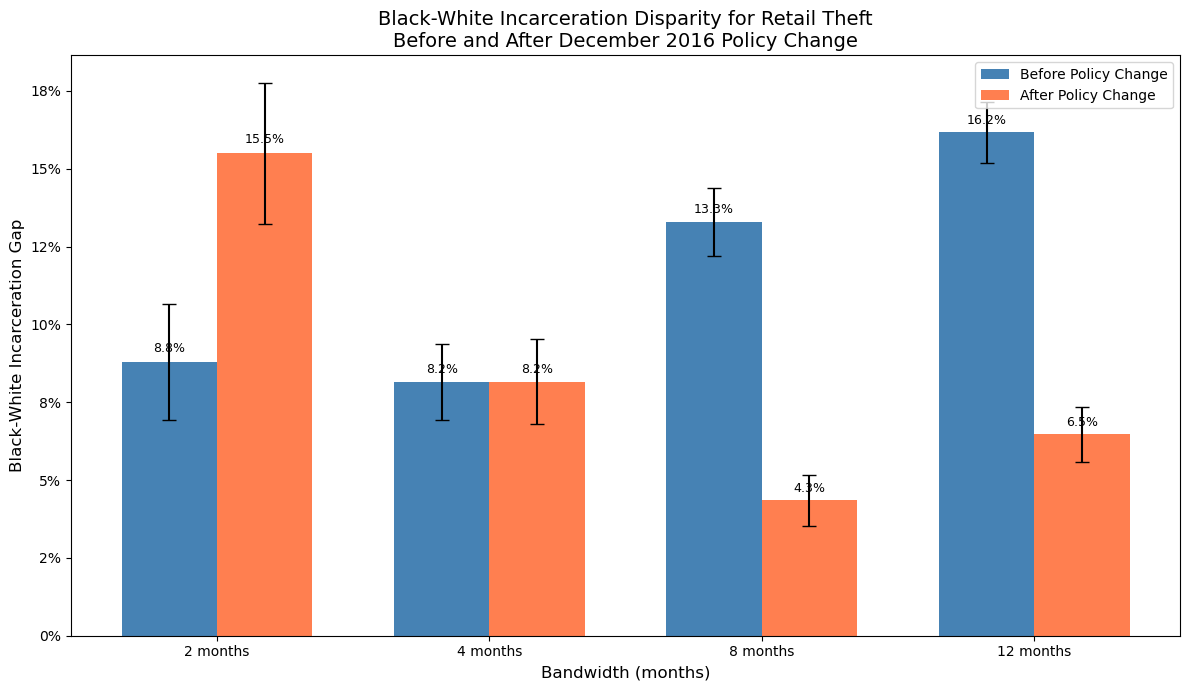

In [23]:
# Create the bar chart with error bars (extra credit)
fig, ax = plt.subplots(figsize=(12, 7))

# Prepare data for plotting
bandwidths_list = [2, 4, 8, 12]
x = np.arange(len(bandwidths_list))
width = 0.35

pre_gaps = []
post_gaps = []
pre_ses = []
post_ses = []

for bw in bandwidths_list:
    pre_row = results_df[(results_df["Bandwidth"] == bw) & (results_df["Period"] == "Pre")]
    post_row = results_df[(results_df["Bandwidth"] == bw) & (results_df["Period"] == "Post")]
    pre_gaps.append(pre_row["Gap (B-W)"].values[0])
    post_gaps.append(post_row["Gap (B-W)"].values[0])
    pre_ses.append(pre_row["SE"].values[0])
    post_ses.append(post_row["SE"].values[0])

# Create bars with error bars
bars1 = ax.bar(x - width/2, pre_gaps, width, label="Before Policy Change", 
               color="steelblue", yerr=pre_ses, capsize=5, error_kw={"linewidth": 1.5})
bars2 = ax.bar(x + width/2, post_gaps, width, label="After Policy Change", 
               color="coral", yerr=post_ses, capsize=5, error_kw={"linewidth": 1.5})

# Customize the chart
ax.set_xlabel("Bandwidth (months)", fontsize=12)
ax.set_ylabel("Black-White Incarceration Gap", fontsize=12)
ax.set_title("Black-White Incarceration Disparity for Retail Theft\nBefore and After December 2016 Policy Change", 
             fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels([f"{bw} months" for bw in bandwidths_list])
ax.legend(loc="upper right")

# Add a horizontal line at y=0 for reference
ax.axhline(y=0, color="black", linestyle="-", linewidth=0.5)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0%}"))

# Add value labels on bars
for bar, gap, se in zip(bars1, pre_gaps, pre_ses):
    height = bar.get_height()
    ax.annotate(f"{gap:.1%}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3 + (se * 100)),
                textcoords="offset points",
                ha="center", va="bottom", fontsize=9)

for bar, gap, se in zip(bars2, post_gaps, post_ses):
    height = bar.get_height()
    ax.annotate(f"{gap:.1%}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3 + (se * 100)),
                textcoords="offset points",
                ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

### 1.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 

#### Answer 
Across bandwidths, the estimated Black–White incarceration gap after the policy change is higher in the very short window, about the same at 4 months, but much lower in longer windows. This pattern lets narrows disparities advocates point to the 8–12 month results as evidence of a meaningful post-policy reduction, while the widen disparities advocates can cite the 2-month spike to argue the change initially coincided with larger disparities or that the conclusion depends heavily on the chosen time.